In [11]:
!pip install nltk sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [13]:
df = pd.read_csv('Ulasan_Pln_Mobile.csv', engine='python', on_bad_lines='skip')  # tanpa sep='\t'

print("=== Daftar Kolom ===")
print(df.columns.tolist())

print("\n=== Jumlah Total Data ===")
print(f"Total baris data: {len(df)}")

print("\n=== Jumlah Nilai Null ===")
print(df[['ulasan', 'rating']].isnull().sum())

print("\n=== Jumlah String Kosong ===")
print("Baris kosong (ulasan):", (df['ulasan'].astype(str).str.strip() == '').sum())
print("Baris kosong (rating):", (df['rating'].astype(str).str.strip() == '').sum())

print("\n=== Duplikat Content ===")
print("Jumlah duplikat:", df['ulasan'].duplicated().sum())

print("\n=== Statistik Score ===")
print(df['rating'].describe())

print("\n=== Distribusi Nilai Score ===")
print(df['rating'].value_counts().sort_index())


=== Daftar Kolom ===
['ulasan', 'rating']

=== Jumlah Total Data ===
Total baris data: 10410

=== Jumlah Nilai Null ===
ulasan    0
rating    0
dtype: int64

=== Jumlah String Kosong ===
Baris kosong (ulasan): 0
Baris kosong (rating): 0

=== Duplikat Content ===
Jumlah duplikat: 0

=== Statistik Score ===
count    10410.000000
mean         2.949183
std          1.414897
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

=== Distribusi Nilai Score ===
rating
1    2180
2    2154
3    2094
4    1979
5    2003
Name: count, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df['char_len'] = df['ulasan'].astype(str).apply(len)
df['word_count'] = df['ulasan'].astype(str).apply(lambda x: len(x.split()))

print("=== Statistik Panjang Ulasan ===")
print("Jumlah total ulasan:", len(df))
print("Rata-rata panjang ulasan (karakter):", df['char_len'].mean())
print("Rata-rata jumlah kata:", df['word_count'].mean())
print("Ulasan terpanjang (karakter):", df['char_len'].max())
print("Ulasan terpendek (karakter):", df['char_len'].min())


=== Statistik Panjang Ulasan ===
Jumlah total ulasan: 10410
Rata-rata panjang ulasan (karakter): 99.7685878962536
Rata-rata jumlah kata: 15.474159462055715
Ulasan terpanjang (karakter): 500
Ulasan terpendek (karakter): 1


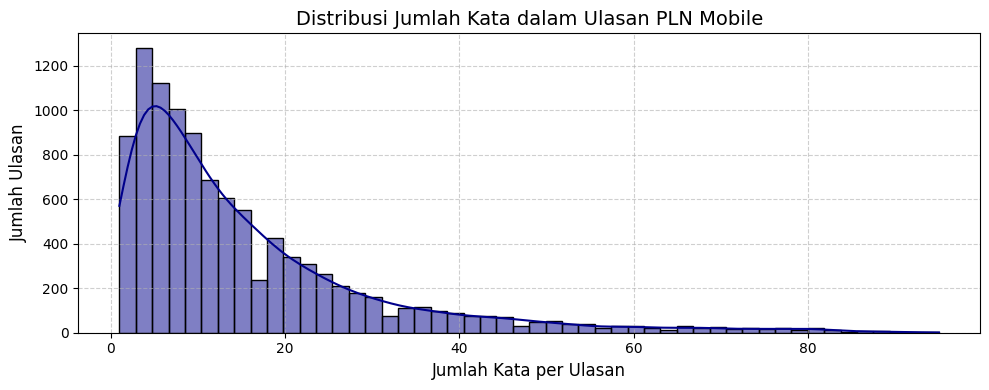

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(df['word_count'], bins=50, kde=True, color='darkblue')
plt.title("Distribusi Jumlah Kata dalam Ulasan PLN Mobile", fontsize=14)
plt.xlabel("Jumlah Kata per Ulasan", fontsize=12)
plt.ylabel("Jumlah Ulasan", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


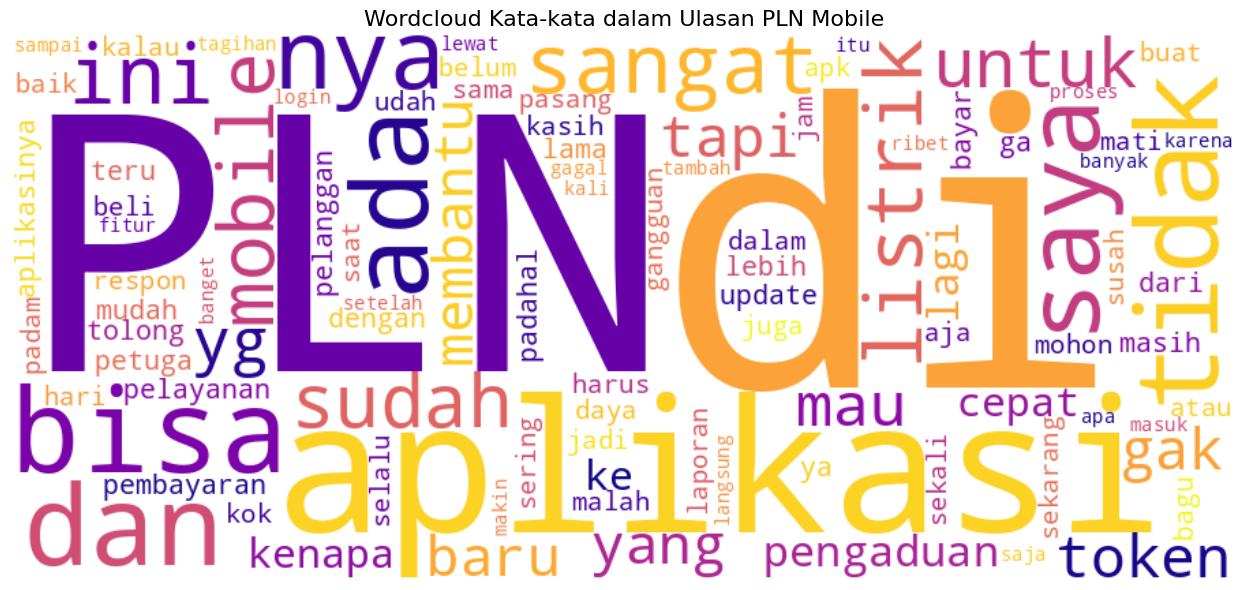

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['ulasan'].astype(str).tolist())

wordcloud = WordCloud(
    width=900,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=100,
    collocations=False
).generate(text)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Kata-kata dalam Ulasan PLN Mobile", fontsize=16)
plt.tight_layout()
plt.show()


In [18]:
print("Kolom saat ini:", df.columns.tolist())
print("\nJumlah kolom:", len(df.columns))

Kolom saat ini: ['ulasan', 'rating', 'char_len', 'word_count']

Jumlah kolom: 4


# PREPROCESSING

## Case Folding

In [19]:
df['clean_text'] = df['ulasan'].astype(str).str.lower()

sample_df = df[['ulasan', 'clean_text']].sample(n=20, random_state=42)
display(sample_df)

,ulasan,clean_text
3952,Terbaik,terbaik
4597,apakah aplikasi PLN mobile bekerjasama dengan ...,apakah aplikasi pln mobile bekerjasama dengan ...
9624,aplikasi nya bagus bangett sih dan bermanfaat ...,aplikasi nya bagus bangett sih dan bermanfaat ...
6871,"saya sdh bermohon, namun blm bayar lewat mana ya","saya sdh bermohon, namun blm bayar lewat mana ya"
4294,"Pion susah ditukar, menghubungi helpdesk juga ...","pion susah ditukar, menghubungi helpdesk juga ..."
3912,SDH seharusnya para pelanggan PLN mengenal dan...,sdh seharusnya para pelanggan pln mengenal dan...
4582,sering banget harga di aplikasi beda sama pas ...,sering banget harga di aplikasi beda sama pas ...
7944,Sangat membantu untuk mengetahui informasi ten...,sangat membantu untuk mengetahui informasi ten...
2340,disuruh update aplikasi terbaru tapi ko ga ada...,disuruh update aplikasi terbaru tapi ko ga ada...
1702,"Tidak membantu, live chat sangat sulit.","tidak membantu, live chat sangat sulit."


## Data Cleaning

In [20]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_symbols(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


df['clean_text'] = df['clean_text'].apply(remove_emojis)
df['clean_text'] = df['clean_text'].apply(clean_symbols)

sample_df = df[['ulasan', 'clean_text']].sample(n=20, random_state=42)
display(sample_df)

,ulasan,clean_text
3952,Terbaik,terbaik
4597,apakah aplikasi PLN mobile bekerjasama dengan ...,apakah aplikasi pln mobile bekerjasama dengan ...
9624,aplikasi nya bagus bangett sih dan bermanfaat ...,aplikasi nya bagus bangett sih dan bermanfaat ...
6871,"saya sdh bermohon, namun blm bayar lewat mana ya",saya sdh bermohon namun blm bayar lewat mana ya
4294,"Pion susah ditukar, menghubungi helpdesk juga ...",pion susah ditukar menghubungi helpdesk juga p...
3912,SDH seharusnya para pelanggan PLN mengenal dan...,sdh seharusnya para pelanggan pln mengenal dan...
4582,sering banget harga di aplikasi beda sama pas ...,sering banget harga di aplikasi beda sama pas ...
7944,Sangat membantu untuk mengetahui informasi ten...,sangat membantu untuk mengetahui informasi ten...
2340,disuruh update aplikasi terbaru tapi ko ga ada...,disuruh update aplikasi terbaru tapi ko ga ada...
1702,"Tidak membantu, live chat sangat sulit.",tidak membantu live chat sangat sulit


## Tokenisasi

In [21]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt', force=True)
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(x))

sample_df = df[['ulasan', 'clean_text', 'tokens']].sample(n=20, random_state=42)
display(sample_df)

,ulasan,clean_text,tokens
3952,Terbaik,terbaik,[terbaik]
4597,apakah aplikasi PLN mobile bekerjasama dengan ...,apakah aplikasi pln mobile bekerjasama dengan ...,"[apakah, aplikasi, pln, mobile, bekerjasama, d..."
9624,aplikasi nya bagus bangett sih dan bermanfaat ...,aplikasi nya bagus bangett sih dan bermanfaat ...,"[aplikasi, nya, bagus, bangett, sih, dan, berm..."
6871,"saya sdh bermohon, namun blm bayar lewat mana ya",saya sdh bermohon namun blm bayar lewat mana ya,"[saya, sdh, bermohon, namun, blm, bayar, lewat..."
4294,"Pion susah ditukar, menghubungi helpdesk juga ...",pion susah ditukar menghubungi helpdesk juga p...,"[pion, susah, ditukar, menghubungi, helpdesk, ..."
3912,SDH seharusnya para pelanggan PLN mengenal dan...,sdh seharusnya para pelanggan pln mengenal dan...,"[sdh, seharusnya, para, pelanggan, pln, mengen..."
4582,sering banget harga di aplikasi beda sama pas ...,sering banget harga di aplikasi beda sama pas ...,"[sering, banget, harga, di, aplikasi, beda, sa..."
7944,Sangat membantu untuk mengetahui informasi ten...,sangat membantu untuk mengetahui informasi ten...,"[sangat, membantu, untuk, mengetahui, informas..."
2340,disuruh update aplikasi terbaru tapi ko ga ada...,disuruh update aplikasi terbaru tapi ko ga ada...,"[disuruh, update, aplikasi, terbaru, tapi, ko,..."
1702,"Tidak membantu, live chat sangat sulit.",tidak membantu live chat sangat sulit,"[tidak, membantu, live, chat, sangat, sulit]"


3 Cell diatas digunakan untuk membersihkan dan memproses teks ulasan, teks diubah ke huruf kecil (lowercase) agar konsisten. Lalu, beberapa fungsi pembersih diterapkan: remove_emojis() untuk menghapus emoji, clean_symbols() untuk menghilangkan simbol atau tanda baca yang tidak penting.

Setelah teks dibersihkan, langkah selanjutnya adalah tokenisasi, yaitu memecah teks menjadi daftar kata menggunakan word_tokenize() dari library NLTK.

## Normalisasi

In [23]:
import ast

kamus = pd.read_csv("colloquial-indonesian-lexicon.csv")
normal_dict = dict(zip(kamus['slang'], kamus['formal']))

def normalize(tokens):
    return [normal_dict.get(w, w) for w in tokens]

df['tokens_normalized'] = df['tokens'].apply(normalize)

sample_df = df[['ulasan', 'tokens', 'tokens_normalized']].sample(n=20, random_state=42)
display(sample_df)


,ulasan,tokens,tokens_normalized
3952,Terbaik,[terbaik],[terbaik]
4597,apakah aplikasi PLN mobile bekerjasama dengan ...,"[apakah, aplikasi, pln, mobile, bekerjasama, d...","[apakah, aplikasi, pln, mobile, bekerjasama, d..."
9624,aplikasi nya bagus bangett sih dan bermanfaat ...,"[aplikasi, nya, bagus, bangett, sih, dan, berm...","[aplikasi, nya, bagus, banget, sih, dan, berma..."
6871,"saya sdh bermohon, namun blm bayar lewat mana ya","[saya, sdh, bermohon, namun, blm, bayar, lewat...","[saya, sudah, bermohon, namun, belum, bayar, l..."
4294,"Pion susah ditukar, menghubungi helpdesk juga ...","[pion, susah, ditukar, menghubungi, helpdesk, ...","[pion, susah, ditukar, menghubungi, helpdesk, ..."
3912,SDH seharusnya para pelanggan PLN mengenal dan...,"[sdh, seharusnya, para, pelanggan, pln, mengen...","[sudah, seharusnya, para, pelanggan, pln, meng..."
4582,sering banget harga di aplikasi beda sama pas ...,"[sering, banget, harga, di, aplikasi, beda, sa...","[sering, banget, harga, di, aplikasi, beda, sa..."
7944,Sangat membantu untuk mengetahui informasi ten...,"[sangat, membantu, untuk, mengetahui, informas...","[sangat, membantu, untuk, mengetahui, informas..."
2340,disuruh update aplikasi terbaru tapi ko ga ada...,"[disuruh, update, aplikasi, terbaru, tapi, ko,...","[disuruh, update, aplikasi, terbaru, tapi, kok..."
1702,"Tidak membantu, live chat sangat sulit.","[tidak, membantu, live, chat, sangat, sulit]","[tidak, membantu, live, chat, sangat, sulit]"


Cell diatas digunakan untuk melakukan normalisasi teks, yaitu mengubah kata-kata tidak baku atau bahasa gaul (slang) menjadi bentuk formal menggunakan kamus lexicon. file colloquial-indonesian-lexicon.csv dibaca untuk memuat kamus normalisasi, yaitu daftar pasangan kata slang dan kata formalnya. Kamus ini dikonversi menjadi dictionary Python (normal_dict) agar proses pencocokan kata lebih efisien. Fungsi normalize(tokens) dibuat untuk mengganti setiap kata dalam list token menjadi kata formal jika ditemukan di kamus, dan jika tidak, kata tersebut dibiarkan tetap.

Kolom baru tokens_normalized dihasilkan dengan menerapkan fungsi normalize() ke setiap baris di kolom tokens

## Stopword Removal

In [24]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

critical_words = {'tidak', 'tak', 'bukan', 'belum', 'enggak', 'ga', 'gak', 'kurang'}
stopwords = stopwords.difference(critical_words)

stopwords.update([
    'listrik','mau', 'nya', 'me', 'peng', 'ter', 'sangat', 'padahal', 'pakai', 'via', 'banget',
    'aja', 'dong', 'ni', 'ya', 'bisa', 'udah', 'cuma', 'oke', 'ok'
])

df['tokens_nostop'] = df['tokens_normalized'].apply(
    lambda tokens: [word for word in tokens if word not in stopwords and len(word) > 2]
)

sample_df = df[['ulasan', 'tokens_normalized', 'tokens_nostop']].sample(n=20, random_state=42)
display(sample_df)


,ulasan,tokens_normalized,tokens_nostop
3952,Terbaik,[terbaik],[terbaik]
4597,apakah aplikasi PLN mobile bekerjasama dengan ...,"[apakah, aplikasi, pln, mobile, bekerjasama, d...","[aplikasi, pln, mobile, bekerjasama, icon, cas..."
9624,aplikasi nya bagus bangett sih dan bermanfaat ...,"[aplikasi, nya, bagus, banget, sih, dan, berma...","[aplikasi, bagus, sih, bermanfaat, pembayaran,..."
6871,"saya sdh bermohon, namun blm bayar lewat mana ya","[saya, sudah, bermohon, namun, belum, bayar, l...","[bermohon, belum, bayar, lewat, mana]"
4294,"Pion susah ditukar, menghubungi helpdesk juga ...","[pion, susah, ditukar, menghubungi, helpdesk, ...","[pion, susah, ditukar, menghubungi, helpdesk, ..."
3912,SDH seharusnya para pelanggan PLN mengenal dan...,"[sudah, seharusnya, para, pelanggan, pln, meng...","[pelanggan, pln, mengenal, dikenalkan, aplikas..."
4582,sering banget harga di aplikasi beda sama pas ...,"[sering, banget, harga, di, aplikasi, beda, sa...","[sering, harga, aplikasi, beda, sama, pas, bay..."
7944,Sangat membantu untuk mengetahui informasi ten...,"[sangat, membantu, untuk, mengetahui, informas...","[membantu, mengetahui, informasi, digunakan, b..."
2340,disuruh update aplikasi terbaru tapi ko ga ada...,"[disuruh, update, aplikasi, terbaru, tapi, kok...","[disuruh, update, aplikasi, terbaru, kok, engg..."
1702,"Tidak membantu, live chat sangat sulit.","[tidak, membantu, live, chat, sangat, sulit]","[tidak, membantu, live, chat, sulit]"


Cell di atas digunakan untuk menghapus kata-kata tidak penting (stopwords) StopWordRemoverFactory() digunakan untuk mendapatkan daftar stopwords standar. Namun, beberapa kata penting seperti tidak, belum, bukan, dan sejenisnya disimpan karena memiliki peran penting dalam penentuan makna kalimat (misalnya dalam kalimat negatif), sehingga daftar stopwords dimodifikasi dengan difference() agar kata-kata tersebut tidak dihapus. Selain itu, daftar stopwords juga diperbarui secara manual dengan menambahkan kata-kata yang umum muncul namun tidak memberikan kontribusi berarti dalam analisis. Dengan pembaruan ini, daftar stopwords menjadi lebih relevan terhadap konteks ulasan aplikasi yang dianalisis.

## Stemming

In [25]:
!pip install tqdm

In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm

stemmer = StemmerFactory().create_stemmer()
tqdm.pandas(desc="Stemming")

df['tokens_clean'] = df['tokens_nostop'].progress_apply(
    lambda tokens: stemmer.stem(' '.join(tokens)).split()
)

df.to_csv("pln_preprocessed_final.csv", index=False)

sample_df = df[['ulasan', 'tokens_nostop', 'tokens_clean']].sample(n=20, random_state=42)
display(sample_df)


Stemming: 100%|██████████| 10410/10410 [08:22<00:00, 20.74it/s]


,ulasan,tokens_nostop,tokens_clean
3952,Terbaik,[terbaik],[baik]
4597,apakah aplikasi PLN mobile bekerjasama dengan ...,"[aplikasi, pln, mobile, bekerjasama, icon, cas...","[aplikasi, pln, mobile, bekerjasama, icon, cas..."
9624,aplikasi nya bagus bangett sih dan bermanfaat ...,"[aplikasi, bagus, sih, bermanfaat, pembayaran,...","[aplikasi, bagus, sih, manfaat, bayar, jadi, l..."
6871,"saya sdh bermohon, namun blm bayar lewat mana ya","[bermohon, belum, bayar, lewat, mana]","[mohon, belum, bayar, lewat, mana]"
4294,"Pion susah ditukar, menghubungi helpdesk juga ...","[pion, susah, ditukar, menghubungi, helpdesk, ...","[pion, susah, tukar, hubung, helpdesk, selesai..."
3912,SDH seharusnya para pelanggan PLN mengenal dan...,"[pelanggan, pln, mengenal, dikenalkan, aplikas...","[langgan, pln, kenal, kenal, aplikasi, pln, mo..."
4582,sering banget harga di aplikasi beda sama pas ...,"[sering, harga, aplikasi, beda, sama, pas, bay...","[sering, harga, aplikasi, beda, sama, pas, bay..."
7944,Sangat membantu untuk mengetahui informasi ten...,"[membantu, mengetahui, informasi, digunakan, b...","[bantu, tahu, informasi, guna, baik]"
2340,disuruh update aplikasi terbaru tapi ko ga ada...,"[disuruh, update, aplikasi, terbaru, kok, engg...","[suruh, update, aplikasi, baru, kok, enggak, t..."
1702,"Tidak membantu, live chat sangat sulit.","[tidak, membantu, live, chat, sulit]","[tidak, bantu, live, chat, sulit]"


Cell di atas digunakan untuk melakukan stemming (mengubah kata ke bentuk dasarnya) menggunakan library Sastrawi, yang dirancang khusus untuk Bahasa Indonesia.

Melakukan stemming menggunakan stemmer.stem() terhadap hasil filter, dan memisahkannya kembali menjadi list (stemmed.split()).

tokens_clean: daftar kata setelah proses stemming.

In [27]:
print(df.columns.tolist())

['ulasan', 'rating', 'char_len', 'word_count', 'clean_text', 'tokens', 'tokens_normalized', 'tokens_nostop', 'tokens_clean']


# LABELING

In [28]:
import pandas as pd
import ast

df = pd.read_csv("pln_preprocessed_final.csv")
df['tokens_clean'] = df['tokens_clean'].apply(ast.literal_eval)

pos_words = set()
neg_words = set()

# InSet lexicon
pos_tsv = pd.read_csv("positive.tsv", sep='\t', skiprows=1, header=None, names=['word', '_'])
neg_tsv = pd.read_csv("negative.tsv", sep='\t', skiprows=1, header=None, names=['word', '_'])
pos_words.update(pos_tsv['word'].str.strip())
neg_words.update(neg_tsv['word'].str.strip())

# Lexicon tambahan (masdevid)
with open("positive.txt", "r", encoding="utf-8") as f:
    pos_words.update([line.strip() for line in f if line.strip()])
with open("negative.txt", "r", encoding="utf-8") as f:
    neg_words.update([line.strip() for line in f if line.strip()])

manual_neg = [
    'lemot', 'ribet', 'batal', 'error', 'eror', 'ganggu', 'padam', 'hilang', 'lambat', 'hang', 'susah',
    'macet', 'blank', 'gagal', 'crash', 'mutar', 'loading', 'lama', 'nambah', 'nolak', 'kecewa', 'salah',
    'bug', 'tunda', 'lelet', 'turun', 'kurang', 'terpotong', 'trouble', 'nyangkut', 'tidakbisa',
    'ulang', 'keluar', 'nutup', 'mulu', 'ulangulang', 'ulangulanglagi', 'menyita', 'menguras',
    'masalah', 'tidakmendukung', 'tidakberfungsi', 'fitnah', 'bikin susah', 'bermasalah',
    'tidaklayak', 'tidakbisaakses', 'dipersulit', 'sampah', 'parah', 'jelek', 'buruk', 'mengecewakan', 'zonk'
]
neg_words.update(manual_neg)

positive_phrases = [
    'terima kasih', 'cepat tanggap', 'sangat membantu', 'mantap sekali',
    'pelayanan bagus', 'sangat puas', 'pengalaman terbaik', 'mudah digunakan',
    'petugas ramah', 'terbantu sekali', 'memuaskan', 'pelayanan terbaik',
    'suka banget', 'oke banget', 'sangat bagus'
]

negative_phrases = [
    'tidak bisa', 'tidak respon', 'tidak jalan', 'tidak nyala', 'tidak muncul',
    'error terus', 'lama banget', 'sangat kecewa', 'layanan buruk',
    'susah digunakan', 'tidak memuaskan', 'keluhan tidak ditanggapi',
    'fitur tidak berfungsi', 'laporan tidak diproses', 'token tidak masuk',
    'gagal login', 'tidak ada solusi', 'layar putih', 'tidak merespon',
    'tidak tanggap', 'fitur hilang', 'saya kecewa', 'tidak bantu',
    'respon lambat', 'padam terus', 'ulang dari awal', 'menguras waktu',
    'bikin emosi', 'nutup aplikasinya', 'ulang mulu', 'tidak mendukung',
    'sangat lambat', 'bikin susah', 'fitur rusak', 'tidak bisa akses',
    'dipersulit', 'bermasalah', 'tidak sesuai harapan',
    'saldo tidak masuk', 'proses sangat lama', 'sudah lapor tapi tidak ditanggapi',
    'tidak ada balasan', 'fitur tidak muncul', 'tidak bisa login'
]

def label_sentiment_binary(tokens, rating):
    if not tokens or len(tokens) < 2:
        return 0, 'negatif'

    if rating == 1:
        return -10, 'negatif'
    if rating == 5:
        return 10, 'positif'

    text = ' '.join(tokens).lower()
    score = 0
    pos_hits, neg_hits = 0, 0
    has_negative_phrase = False
    negation_terms = {'tidak', 'tak', 'enggak', 'tdk', 'bukan'}
    intensifiers = {'sangat', 'banget', 'sekali', 'amat', 'terlalu'}

    for phrase in negative_phrases:
        if phrase in text:
            score -= 5
            neg_hits += 1
            has_negative_phrase = True

    for phrase in positive_phrases:
        if phrase in text:
            score += 3
            pos_hits += 1

    i = 0
    while i < len(tokens):
        word = tokens[i].lower()
        next_word = tokens[i+1].lower() if i+1 < len(tokens) else ''

        if word in negation_terms and next_word in pos_words:
            score -= 3
            neg_hits += 1
            i += 2
            continue
        elif word in negation_terms and next_word in neg_words:
            score += 1
            pos_hits += 1
            i += 2
            continue

        if word in intensifiers and next_word in pos_words:
            score += 1
            pos_hits += 1
            i += 2
            continue
        elif word in intensifiers and next_word in neg_words:
            score -= 4
            neg_hits += 1
            i += 2
            continue

        if word in pos_words:
            score += 2 if word in {'bagus', 'baik', 'mantap', 'bantu', 'mudah', 'top'} else 1
            pos_hits += 1
        elif word in neg_words:
            penalty = -4 if word in {'sampah', 'parah', 'buruk', 'zonk', 'mengecewakan', 'gagal', 'lelet'} else -2
            score += penalty
            neg_hits += 1

        i += 1

    if "terima kasih" in text:
        score += 1
        pos_hits += 1

    if any(keluhan in text for keluhan in ['gagal', 'lelet', 'error', 'tidak bisa', 'percuma', 'padam']):
        score -= 5
        neg_hits += 1
        has_negative_phrase = True

    if has_negative_phrase:
        return score, 'negatif'

    if rating == 5:
        return score, 'positif'
    if rating == 4:
        if score >= 2 or pos_hits > neg_hits:
            return score, 'positif'
        else:
            return score, 'negatif'
    if rating == 3:
        if score >= 4:
            return score, 'positif'
        else:
            return score, 'negatif'
    if rating == 2:
        return score, 'negatif'

    if score >= 4 and pos_hits > neg_hits:
        return score, 'positif'
    elif score <= -2 or (neg_hits >= pos_hits and score <= 1):
        return score, 'negatif'
    elif pos_hits > 0 and neg_hits == 0 and score > 2:
        return score, 'positif'
    else:
        return score, 'negatif'


df[['sentiment_score', 'label']] = df.apply(lambda row: pd.Series(label_sentiment_binary(row['tokens_clean'], row['rating'])), axis=1)

print("=== Distribusi Label (Positif/Negatif) ===")
print(df['label'].value_counts())

for lbl in ['positif', 'negatif']:
    print(f"\n=== Sample: {lbl.upper()} ===")
    sample = df[df['label'] == lbl].sample(10, random_state=15)
    for _, row in sample.iterrows():
        print(f"\nUlasan Asli: {row['tokens_clean']}")
        print(f"Rating: {row['rating']}")
        print(f"Skor: {row['sentiment_score']} → Label: {row['label']}")

=== Distribusi Label (Positif/Negatif) ===
label
negatif    6992
positif    3418
Name: count, dtype: int64

=== Sample: POSITIF ===

Ulasan Asli: ['pln', 'mobile', 'makin', 'jos']
Rating: 5
Skor: 10 → Label: positif

Ulasan Asli: ['makin', 'lebih', 'baik', 'nyaman']
Rating: 5
Skor: 10 → Label: positif

Ulasan Asli: ['mantap', 'fast', 'respon']
Rating: 5
Skor: 10 → Label: positif

Ulasan Asli: ['aplikasi', 'pln', 'mobile', 'bagus', 'aplikasi', 'lebih', 'mudah', 'beli', 'pulsa']
Rating: 5
Skor: 10 → Label: positif

Ulasan Asli: ['pln', 'mobile', 'bantu', 'sekali', 'buat', 'langgan', 'depan', 'moga', 'lebih', 'baik']
Rating: 5
Skor: 10 → Label: positif

Ulasan Asli: ['bantu', 'kali', 'tambai', 'barcode', 'catat', 'spedometer', 'lebih', 'mudah']
Rating: 4
Skor: 5 → Label: positif

Ulasan Asli: ['segala', 'urus', 'listrik', 'jadi', 'mudah', 'pln', 'mobile']
Rating: 5
Skor: 10 → Label: positif

Ulasan Asli: ['belum', 'laku', 'transaksi']
Rating: 4
Skor: 1 → Label: positif

Ulasan Asli: ['lan

Cell diatas menjalankan proses pelabelan sentimen biner (positif atau negatif) terhadap ulasan pengguna aplikasi PLN Mobile berdasarkan kombinasi skor lexicon dan rating. Dataset yang digunakan adalah pln_preprocessed_final.csv, di mana kolom tokens_clean berisi hasil preprocessing berupa daftar token. Karena token disimpan sebagai string dalam file CSV, fungsi ast.literal_eval() digunakan untuk mengubahnya kembali ke bentuk list Python agar dapat diproses lebih lanjut.

Langkah pertama dalam pelabelan adalah membangun kamus kata-kata sentimen (lexicon). Dua sumber utama dimuat: file positive.tsv dan negative.tsv dari dataset InSet (Fajri91), serta file positive.txt dan negative.txt dari dataset ID-Opinion (Masdevid). Semua kata dari kedua sumber dimasukkan ke dalam set pos_words (positif) dan neg_words (negatif). Selain itu, daftar kata negatif tambahan dimasukkan secara manual melalui variabel manual_neg untuk menangkap kata-kata yang spesifik muncul pada konteks ulasan negatif PLN Mobile, seperti “lemot”, “padam”, “gagal”, “dipersulit”, dan lain-lain.

Selanjutnya, dua daftar frasa sentimen penting didefinisikan: positive_phrases dan negative_phrases, yang mencakup kombinasi kata yang mengekspresikan makna kuat secara langsung. Frasa-frasa ini akan dicocokkan secara eksplisit di teks ulasan gabungan agar pengaruhnya tercermin dalam skor sentimen. Frasa negatif seperti “gagal login” atau “fitur tidak berfungsi” akan mengurangi skor secara signifikan, sedangkan frasa positif seperti “terima kasih” atau “pelayanan terbaik” akan menambah skor.

Fungsi utama label_sentiment_binary() menerima dua parameter: daftar token (tokens) dan skor rating bintang (rating). Fungsi ini diawali dengan penanganan khusus untuk rating ekstrem: jika rating adalah 1 maka label langsung “negatif” dengan skor -10, dan jika rating 5 maka langsung “positif” dengan skor +10. Jika tidak, fungsi menggabungkan token menjadi teks utuh untuk keperluan pencocokan frasa, lalu memulai proses perhitungan skor.

Skor dihitung dengan mempertimbangkan: kemunculan frasa, deteksi negasi (misalnya “tidak bagus” akan diklasifikasi sebagai negatif), intensifier (kata penguat seperti “sangat”), serta bobot dari setiap kata positif dan negatif. Kata positif seperti “baik”, “mantap”, dan “mudah” bisa menambah skor +2, sedangkan kata negatif seperti “sampah”, “gagal”, dan “buruk” bisa mengurangi skor hingga -4 tergantung kekuatannya. Jika frasa negatif utama ditemukan, maka label langsung diberikan sebagai “negatif” tanpa memperhitungkan aspek lain.

Setelah semua analisis, label ditentukan berdasarkan kombinasi skor akhir, jumlah kata positif vs negatif, dan rating. Misalnya, rating 4 dengan skor ≥ 2 atau jumlah kata positif lebih banyak akan diberi label “positif”. Jika tidak memenuhi kondisi kuat, label default-nya adalah “negatif” agar sistem lebih sensitif terhadap keluhan.

Hasil akhir dari fungsi disimpan ke dua kolom baru dalam dataframe: sentiment_score (angka) dan label (kategori “positif” atau “negatif”). Kemudian, distribusi label dicetak untuk menunjukkan proporsi hasil klasifikasi, serta ditampilkan contoh 10 ulasan acak untuk masing-masing kategori agar dapat diverifikasi secara manual.

**Rumus Label**

```
Positif: Jika rating tinggi (5 atau 4) dan skor cukup tinggi (≥2), atau kata/frasa positif dominan.

Negatif: Jika rating rendah (1 atau 2), ada frasa negatif, atau skor rendah (≤ -2),
         atau kata/frasa negatif dominan.

Label default: Negatif jika tidak memenuhi kondisi positif.

```




**Bagian Label: POSITIF**

|    | Ulasan Asli                                                                                                       | Skor | Label   | Analisis                                                                                      |
| -- | ----------------------------------------------------------------------------------------------------------------- | ---- | ------- | --------------------------------------------------------------------------------------------- |
| 1  | pln mobile makin jos                                                                                              | 10   | positif | Sesuai – kalimat singkat dengan kata positif dominan                                          |
| 2  | makin lebih baik nyaman                                                                                            | 10   | positif | Sesuai – semua kata bernuansa positif                                                         |
| 3  | mantap fast respon                                                                                                 | 10   | positif | Sesuai – mengandung pujian dan respons cepat                                                  |
| 4  | aplikasi pln mobile bagus aplikasi lebih mudah beli pulsa                                                          | 10   | positif | Sesuai – kata *bagus* dan *mudah* mendominasi, konteks jelas mendukung label positif          |
| 5  | pln mobile bantu sekali buat langgan depan moga lebih baik                                                         | 10   | positif | Sesuai – bernada dukungan dan harapan baik                                                    |
| 6  | bantu kali tambai barcode catat spedometer lebih mudah                                                             | 5    | positif | Sesuai – skor sedang namun makna kalimat dominan positif                                      |
| 7  | segala urus listrik jadi mudah pln mobile                                                                          | 10   | positif | Sesuai – kata *mudah* menegaskan kemudahan layanan                                            |
| 8  | belum laku transaksi                                                                                                | 1    | positif | Sesuai – meski skor rendah, tidak ada kata negatif yang kuat sehingga tetap terklasifikasi positif |
| 9  | lancar bulan tidak buka bikin gemas aku lebih suka lapor sendiri meter takut kalo tugas entar main dengkul app baik bantu | 10   | positif | Sesuai – meski ada frasa “tidak buka”, ada kata positif baik dan bantu juga memberikan rating 5 |
| 10 | bantu mulai bayar adu                                                                                              | 2    | positif | Sesuai – skor rendah namun kata *bantu* memberi bobot positif yang cukup                      |
                                        |

```
Kesalahan di label POSITIF: 0/10
```
**Bagian Label: NEGATIF**

|    | Ulasan Asli                                                                                                                                        | Skor  | Label   | Analisis                                                                                                  |
| -- | -------------------------------------------------------------------------------------------------------------------------------------------------- | ----- | ------- | --------------------------------------------------------------------------------------------------------- |
| 1  | pas bayar tagih tiba tiba aplikasi error uang potong                                                                                                | -11   | negatif | Sesuai – mengandung keluhan jelas terkait error aplikasi dan potongan uang                               |
| 2  | pln luar biasa                                                                                                                                      | 1     | negatif | Tidak Sesuai – kata positif, namun rating rendah memengaruhi label menjadi negatif                            |
| 3  | enggak login                                                                                                                                        | -10   | negatif | Sesuai – keluhan langsung tanpa kata positif                                                              |
| 4  | layan live chat enggak guna                                                                                                                         | -10   | negatif | Sesuai – mengkritik layanan live chat                                                                     |
| 5  | tambah daya lalu aplikasi belum upgrade versi baru enggak versi baru                                                                                | 0     | negatif | Sesuai – mengeluhkan pembaruan aplikasi yang belum tersedia                                               |
| 6  | baru selalu susah buka tulisamnya eror sambung lancar jaya sinyal                                                                                   | -10   | negatif | Sesuai – keluhan terkait akses aplikasi yang sulit meski sinyal lancar                                    |
| 7  | baik                                                                                                                                                 | 0     | negatif | Tidak Sesuai – kata positif tunggal tetapi tidak cukup kuat mengubah label karena faktor rating                                                     |
| 8  | aplikasi pihak tiga bukan asli pln kok jual token biaya admin enggak jelas                                                                          | -9    | negatif | Sesuai – keluhan tentang pihak ketiga dan biaya admin yang tidak jelas                                    |
| 9  | beli token jam stngh malam lama kode tokennya enggak muncul2 status bayar lunas kalo beli app langsung keluar kode stroom                           | -6    | negatif | Sesuai – keluhan tentang keterlambatan kode token                                                         |
| 10 | update makin tidak jelas sulit aju pasang baru foto selfi kayak pinjam uang                                                                         | -10   | negatif | Sesuai – keluhan kompleks mengenai proses pemasangan baru yang rumit                                       |
                                  |
                                |


```
Kesalahan di label NEGATIF: 2/10
```



**Evaluasi**

```
| Label     | Total Sampel | Salah Label | Benar Label | Akurasi per Label |
| --------- | ------------ | ----------- | ----------- | ----------------- |
| Positif   | 10           | 0           | 10          | 100%              |
| Negatif   | 10           | 2           | 8          | 80%              |
| **Total** | **20**       | **2**       | **18**      | **90% (validasi manual)**  |

```




In [29]:
df.to_csv("pln_sentiment_labeled.csv", index=False)
print("\nHasil disimpan ke: pln_sentiment_labeled.csv")


Hasil disimpan ke: pln_sentiment_labeled.csv


# EDA

In [32]:
import pandas as pd

df = pd.read_csv("pln_sentiment_labeled.csv")
print("Jumlah data:", len(df))

Jumlah data: 10410


## Distribusi Label Sentimen

/tmp/ipython-input-3663529619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2')


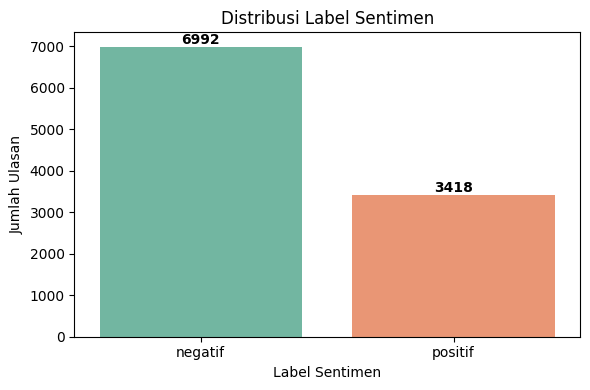

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2')

for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, count + 2, count,
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Distribusi Label Sentimen")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.tight_layout()
plt.show()


## Panjang Ulasan (Distribusi Jumlah Kata)

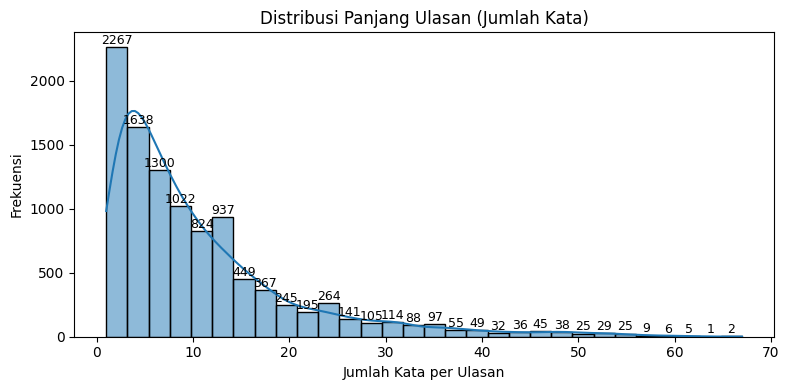

In [34]:
df['jumlah_kata'] = df['tokens_clean'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 4))
ax = sns.histplot(df['jumlah_kata'], bins=30, kde=True)
plt.title("Distribusi Panjang Ulasan (Jumlah Kata)")
plt.xlabel("Jumlah Kata per Ulasan")
plt.ylabel("Frekuensi")

for p in ax.patches:
    if p.get_height() > 0:
        freq = int(p.get_height())
        ax.text(p.get_x() + p.get_width()/2,
                p.get_height() + 1,
                freq,
                ha='center',
                va='bottom',
                fontsize=9)

plt.tight_layout()
plt.show()


## Rata-rata Panjang Ulasan per Label

In [35]:
rata_panjang = df.groupby("label")["jumlah_kata"].mean().sort_values(ascending=False)
print("Rata-rata jumlah kata per label:\n", rata_panjang)


Rata-rata jumlah kata per label:
 label
negatif    12.106693
positif     7.884435
Name: jumlah_kata, dtype: float64


## Korelasi antara Rating dan Label

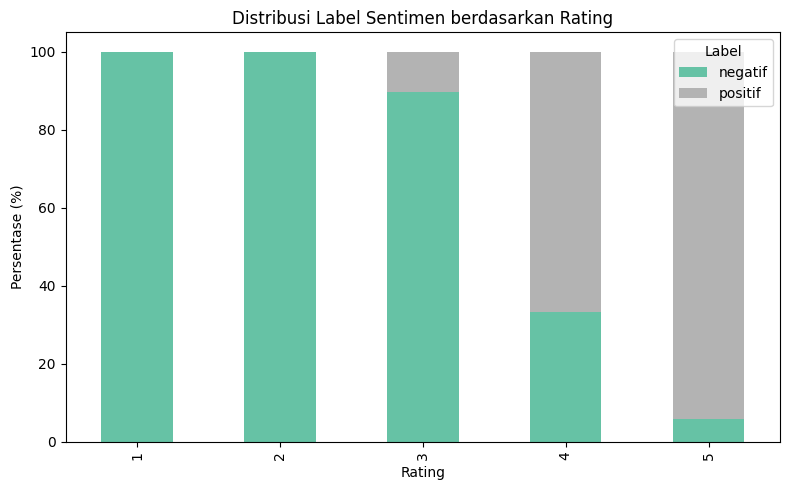

In [36]:
cross = pd.crosstab(df['rating'], df['label'], normalize='index') * 100
cross.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
plt.title("Distribusi Label Sentimen berdasarkan Rating")
plt.xlabel("Rating")
plt.ylabel("Persentase (%)")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


Cell diatas berfungsi untuk memvisualisasikan hubungan antara rating pengguna dan label sentimen yang dihasilkan, dengan menampilkan grafik batang bertumpuk yang menunjukkan persentase distribusi label (positif/negatif) pada setiap tingkat rating. Dengan begitu, dapat melihat sejauh mana label sentimen sesuai atau konsisten dengan nilai rating yang diberikan oleh pengguna.

## Top Kata Positif vs Negatif (Berdasarkan Token Normalized)

/tmp/ipython-input-4221141742.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in common_pos], y=[x[0] for x in common_pos], ax=axes[0], palette="Greens")
/tmp/ipython-input-4221141742.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in common_neg], y=[x[0] for x in common_neg], ax=axes[1], palette="Reds")


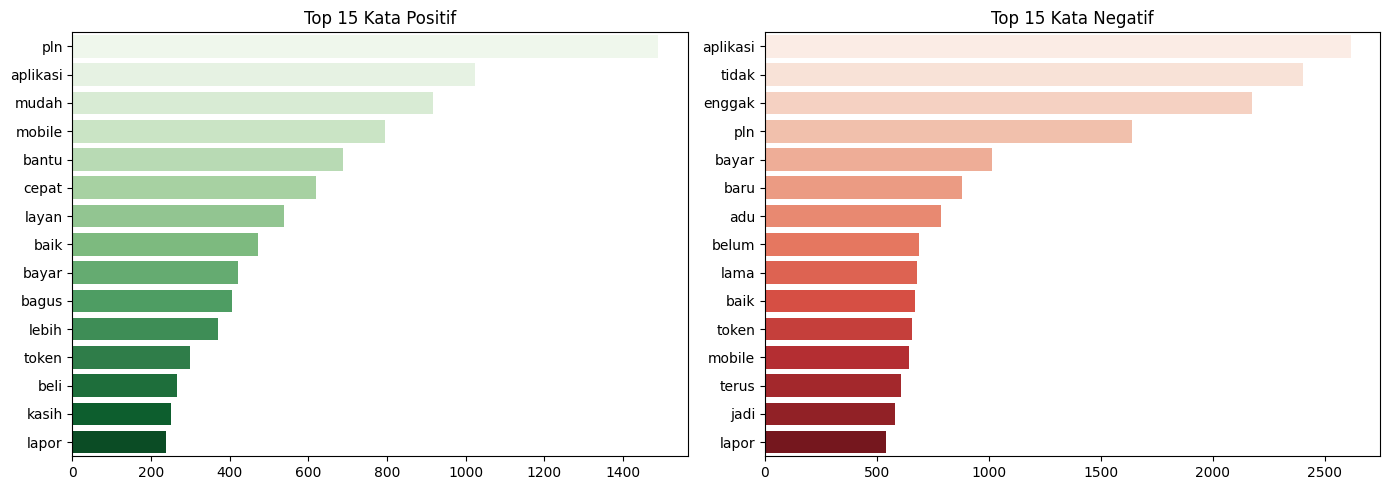

In [37]:
from collections import Counter
import ast

df['tokens_clean'] = df['tokens_clean'].apply(ast.literal_eval)

tokens_pos = sum(df[df['label'] == 'positif']['tokens_clean'], [])
tokens_neg = sum(df[df['label'] == 'negatif']['tokens_clean'], [])

common_pos = Counter(tokens_pos).most_common(15)
common_neg = Counter(tokens_neg).most_common(15)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=[x[1] for x in common_pos], y=[x[0] for x in common_pos], ax=axes[0], palette="Greens")
axes[0].set_title("Top 15 Kata Positif")
sns.barplot(x=[x[1] for x in common_neg], y=[x[0] for x in common_neg], ax=axes[1], palette="Reds")
axes[1].set_title("Top 15 Kata Negatif")
plt.tight_layout()
plt.show()


## Pemeriksaan Duplikasi dan Null

In [38]:
print("Jumlah duplikat di kolom tokens_normalized:", df.duplicated(subset="tokens_clean").sum())
print("Jumlah data null di kolom tokens_normalized:", df['tokens_clean'].isnull().sum())

Jumlah duplikat di kolom tokens_normalized: 681
Jumlah data null di kolom tokens_normalized: 0


In [39]:
df = df.drop_duplicates(subset='tokens_clean').reset_index(drop=True)
print("Setelah hapus duplikat:", len(df))

Setelah hapus duplikat: 9729


# DATA PROCESSING

## Undersampling

In [40]:
df = (
    df.groupby('label', group_keys=False)
      .apply(lambda x: x.sample(3106, random_state=42))
      .reset_index(drop=True)
)

print("Setelah undersampling:", len(df))
print(df['label'].value_counts())

print("\nContoh hasil setelah undersampling:")
display(df[['label', 'tokens_clean']].head())


Setelah undersampling: 6212
label
negatif    3106
positif    3106
Name: count, dtype: int64

Contoh hasil setelah undersampling:


/tmp/ipython-input-411201878.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(3106, random_state=42))


,label,tokens_clean
0,negatif,"[aplikasi, tidak, buka, mohon, penjelasamdnya]"
1,negatif,"[update, malah, lelet, aju, ubah, daya, subsid..."
2,negatif,"[tidak, login, stuk, buat, pin]"
3,negatif,"[masalah, sama, lama, kirim, kode, konfirmasi,..."
4,negatif,[ajar]


Cell diatas melakukan undersampling terhadap dataset agar jumlah data pada setiap label (positif dan negatif) menjadi seimbang. setiap kelompok berdasarkan label diambil sampel sebanyak jumlah_min (jumlah label terendah sebelumnya), lalu hasilnya digabung kembali. Ini berguna untuk mencegah bias model terhadap label yang dominan saat pelatihan.

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping label:", label_mapping)


Mapping label: {'negatif': np.int64(0), 'positif': np.int64(1)}


Cell diatas digunakan untuk mengubah label sentimen berbentuk teks (seperti "positif", "negatif") menjadi nilai numerik menggunakan LabelEncoder dari scikit-learn. Proses ini diperlukan agar label dapat digunakan dalam pelatihan model machine learning yang membutuhkan input numerik.

In [43]:
df['text_final'] = df['tokens_clean'].apply(lambda x: ' '.join(x))

In [44]:
all_tokens = [token for tokens in df['tokens_clean'] for token in tokens]

unique_tokens = set(all_tokens)
print("Jumlah total kata unik:", len(unique_tokens))

Jumlah total kata unik: 5367


Cell diatas menggabungkan token-token yang sudah dibersihkan (tokens_clean) menjadi teks utuh per ulasan dan menyimpannya di kolom text_final, yang akan digunakan untuk ekstraksi fitur teks TF-IDF. Setelah itu, seluruh token dari semua ulasan dikumpulkan dan dihitung jumlah kata uniknya. Tujuannya adalah untuk mengetahui ukuran kosakata (vocabulary size) dalam dataset sebagai gambaran keragaman kata yang akan diproses oleh model.

## Split Data (Latih & Uji)

In [45]:
from sklearn.model_selection import train_test_split

X = df['text_final']
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 4969
Jumlah data uji: 1243


Cell diatas digunakan untuk membagi data menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Parameter stratify=y memastikan bahwa distribusi label tetap seimbang di kedua subset, sedangkan random_state=42 digunakan agar pembagian data bersifat konsisten dan dapat direproduksi. Pembagian ini bertujuan agar model hanya belajar dari data latih, dan diuji pada data yang belum pernah dilihat sebelumnya, sehingga mencegah data leakage (kebocoran data) dan menghasilkan evaluasi model yang lebih objektif.

In [46]:
import pandas as pd
import numpy as np
from IPython.display import display

train_dist = y_train.value_counts().rename_axis('label_encoded').reset_index(name='jumlah_data_latih')
test_dist = y_test.value_counts().rename_axis('label_encoded').reset_index(name='jumlah_data_uji')

distribusi = pd.merge(train_dist, test_dist, on='label_encoded')
print("Distribusi Label")
display(distribusi)

df['jumlah_kata'] = df['tokens_clean'].apply(len)
rata_kata = df.groupby('label')['jumlah_kata'].mean().reset_index()
rata_kata.columns = ['label', 'rata_rata_jumlah_kata']

print("\nRata-rata Jumlah Kata per Label")
display(rata_kata)

display(df[['tokens_clean', 'text_final', 'label', 'label_encoded']].head(3))


Distribusi Label


,label_encoded,jumlah_data_latih,jumlah_data_uji
0,1,2485,621
1,0,2484,622



Rata-rata Jumlah Kata per Label


,label,rata_rata_jumlah_kata
0,negatif,12.632003
1,positif,8.424984


,tokens_clean,text_final,label,label_encoded
0,"[aplikasi, tidak, buka, mohon, penjelasamdnya]",aplikasi tidak buka mohon penjelasamdnya,negatif,0
1,"[update, malah, lelet, aju, ubah, daya, subsid...",update malah lelet aju ubah daya subsidi lelet...,negatif,0
2,"[tidak, login, stuk, buat, pin]",tidak login stuk buat pin,negatif,0


## Pembobotan - TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5363,
    ngram_range=(1, 2),
    sublinear_tf=True,
    min_df=1,
    max_df=0.85,
    lowercase=True
)

X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF")
print(f"Jumlah fitur: {len(tfidf.get_feature_names_out())}")
print(f"Shape X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape X_test_tfidf : {X_test_tfidf.shape}")
print("Jumlah fitur TF-IDF yang dipakai:", len(tfidf.get_feature_names_out()))


TF-IDF
Jumlah fitur: 5363
Shape X_train_tfidf: (4969, 5363)
Shape X_test_tfidf : (1243, 5363)
Jumlah fitur TF-IDF yang dipakai: 5363


Cell di atas digunakan untuk ekstraksi fitur teks menggunakan metode TF-IDF (Term Frequency–Inverse Document Frequency). Langkah ini bertujuan untuk mengubah data teks mentah menjadi representasi numerik (matriks sparse) yang bisa diproses oleh algoritma machine learning. TfidfVectorizer digunakan dengan beberapa parameter penting: max_features=5363 membatasi jumlah fitur (kata atau frasa) yang diambil hanya sebanyak 5.363 fitur teratas berdasarkan skor TF-IDF; ngram_range=(1, 2), vektor akan menyertakan unigram dan bigram (kata tunggal dan pasangan kata); sublinear_tf=True mengubah frekuensi term menjadi logaritmik agar tidak terlalu dipengaruhi kata yang muncul sangat sering; min_df=1 mengikutkan semua kata yang muncul setidaknya di 1 dokumen; max_df=0.85 menghilangkan kata-kata yang muncul di lebih dari 85% dokumen karena dianggap kurang informatif; dan lowercase=True memastikan semua kata diubah menjadi huruf kecil untuk konsistensi.

Proses ekstraksi dilakukan dalam dua tahap: fit_transform() digunakan pada X_train untuk belajar dan membentuk representasi TF-IDF dari data latih sekaligus mengubahnya menjadi matriks fitur. Sedangkan transform() pada X_test hanya mengubah data uji ke bentuk yang sama berdasarkan fitur yang telah dipelajari dari data latih, tanpa menyentuh atau menambahkan informasi baru dari data uji—hal ini mencegah data leakage. Output yang ditampilkan menunjukkan jumlah fitur TF-IDF yang digunakan serta bentuk (shape) dari matriks hasil ekstraksi fitur pada data latih dan uji. Dengan ini, model machine learning dapat memanfaatkan representasi numerik dari teks untuk pelatihan dan evaluasi.

### Diagram Batang (bar chart) dari kata dengan bobot TF-IDF tertinggi

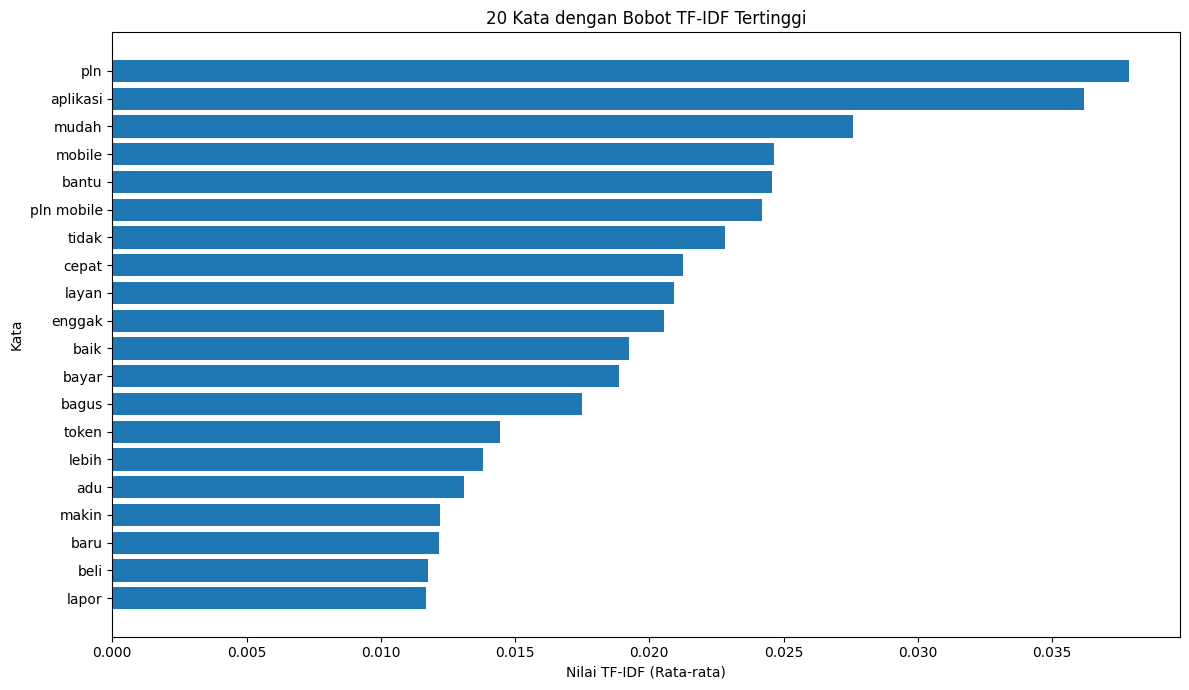

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil seluruh fitur (kata) dari TF-IDF
feature_names = np.array(tfidf.get_feature_names_out())


tfidf_mean = X_train_tfidf.mean(axis=0).A1

top_n = 20
top_indices = np.argsort(tfidf_mean)[-top_n:]

top_features = feature_names[top_indices]
top_scores = tfidf_mean[top_indices]

plt.figure(figsize=(12, 7))
plt.barh(top_features, top_scores)
plt.xlabel("Nilai TF-IDF (Rata-rata)")
plt.ylabel("Kata")
plt.title("20 Kata dengan Bobot TF-IDF Tertinggi")
plt.tight_layout()
plt.show()

In [80]:
import numpy as np
import pandas as pd

idx = 20
sample_text = X_train.iloc[idx]
sample_vector = X_train_tfidf[idx].toarray()[0]

top_indices = np.argsort(sample_vector)[::-1][:10]
top_words = [(tfidf.get_feature_names_out()[i], sample_vector[i]) for i in top_indices]

print("=== BEFORE (Teks Asli) ===")
print(sample_text)

print("\n=== AFTER (10 Kata Terkuat versi TF-IDF) ===")
for word, score in top_words:
    print(f"{word:<20} : {score:.4f}")


=== BEFORE (Teks Asli) ===
aplikasi lumayan bagus padam sering enggak jelas pln ngerusak eletronik orang matiin lampu enak jidat dar usul kalau baik madam kasih tau langgan jadwal utama notifikasi aplikasi pln mobile rusa elektronik langgan kerja tunda tidak kompensasi pln akibat padam tiba tiba

=== AFTER (10 Kata Terkuat versi TF-IDF) ===
tiba                 : 0.2222
matiin lampu         : 0.2069
padam sering         : 0.2069
kompensasi           : 0.2069
akibat               : 0.1998
jelas pln            : 0.1998
kasih tau            : 0.1998
sering enggak        : 0.1998
notifikasi aplikasi  : 0.1998
padam                : 0.1974


## Klasifikasi Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

Cell di atas digunakan untuk membangun model klasifikasi teks menggunakan algoritma Multinomial Naive Bayes dengan parameter default. Model ini dilatih (fit) menggunakan data latih X_train_tfidf dan label y_train

Setelah proses pelatihan selesai, model yang dihasilkan adalah (nb_model)digunakan untuk memprediksi label pada data uji.

# Evaluasi Hasil


Classification Report (Multinomial Naive Bayes) ===
              precision    recall  f1-score   support

     negatif       0.84      0.89      0.86       622
     positif       0.88      0.83      0.85       621

    accuracy                           0.86      1243
   macro avg       0.86      0.86      0.86      1243
weighted avg       0.86      0.86      0.86      1243



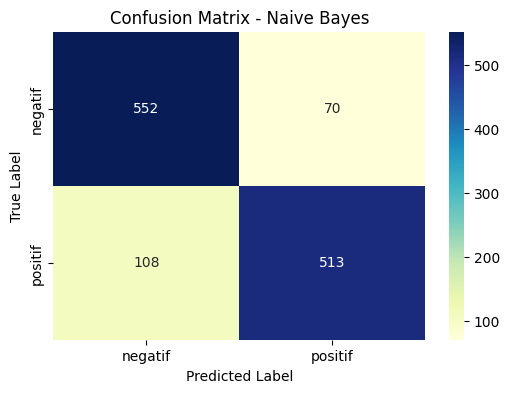

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = nb_model.predict(X_test_tfidf)

print("\nClassification Report (Multinomial Naive Bayes) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Cell diatas digunakan untuk evaluasi model Multinomial Naive Bayes pada data uji dengan memprediksi label (y_pred), lalu menampilkan classification report berisi precision, recall, dan F1-score untuk setiap kelas, serta membuat confusion matrix yang menggambarkan jumlah prediksi benar dan salah antar kelas. Confusion matrix kemudian divisualisasikan dalam bentuk heatmap menggunakan Seaborn, sehingga memudahkan identifikasi pola kesalahan dan melihat kelas mana yang sering tertukar.

## Error Analysis (FP & FN)

In [78]:
import pandas as pd
from IPython.display import display

pd.set_option('display.max_colwidth', None)

df_result = pd.DataFrame({
    'text': X_test,
    'true_label': y_test,
    'pred_label': y_pred
})

false_positive = df_result[
    (df_result['true_label'] == le.transform(['negatif'])[0]) &
    (df_result['pred_label'] == le.transform(['positif'])[0])
]

false_negative = df_result[
    (df_result['true_label'] == le.transform(['positif'])[0]) &
    (df_result['pred_label'] == le.transform(['negatif'])[0])
]

df_result['true_label'] = le.inverse_transform(df_result['true_label'])
df_result['pred_label'] = le.inverse_transform(df_result['pred_label'])

print("\n=== False Positive (Negatif → Positif) ===")
display(false_positive.sample(3, random_state=5)[['text', 'true_label', 'pred_label']])


print("\n=== False Negative (Positif → Negatif) ===")
display(false_negative.sample(3, random_state=5)[['text', 'true_label', 'pred_label']])




=== False Positive (Negatif → Positif) ===


,text,true_label,pred_label
2729,aplikasi pln mobile kurang layak guna mohon pasang baru,0,1
2928,terimkasih,0,1
684,mohon maaf bok belum rubah daya bayar tambah daya sukses memang main oknum tugas pln lapang mohon bantu,0,1



=== False Negative (Positif → Negatif) ===


,text,true_label,pred_label
5313,baik analisa objektif analisa subjektif rubah realitas jadi idealis,1,0
5902,belum pernah guna baru daftar,1,0
4505,min mohon tingkat servernya selalu down terus nih terimakasih,1,0


Kesalahan false positive pada model Naive Bayes terutama muncul karena model  mengandalkan kata-kata yang punya probabilitas tinggi di kelas positif, tanpa mempertimbangkan konteks kalimat secara keseluruhan. Pada ulasan seperti “aplikasi pln mobile kurang layak guna mohon pasang baru”, membuat model mengabaikan kata negatif seperti “kurang layak”. Untuk kata “terimkasih”, kesalahan prediksi lebih disebabkan oleh ketidaksesuaian dalam proses normalisasi teks, karena bentuk kata tersebut kemungkinan tidak tersedia di kamus normalisasi sehingga tidak terdeteksi sebagai bagian dari pola bahasa yang umum. Berdasarkan contoh kesalahan seperti “aplikasi pln mobile kurang layak guna mohon pasang baru”, “terimkasih”, dan “mohon maaf bok belum rubah daya…”, dapat diidentifikasi bahwa aspek layanan yang salah dipahami oleh model meliputi keluhan terkait versi aplikasi dan fitur ubah daya, serta pelayanan petugas lapangan..



Pada kasus false negative, Contohnya, pada teks “belum pernah guna baru daftar”, model memprediksi negatif karena tidak menemukan kata-kata positif yang jelas, sehingga ulasan yang sebenarnya bersifat non-negatif atau memberikan indikasi pengalaman awal yang baik justru diklasifikasikan secara keliru. Sementara itu, ulasan seperti “baik analisa objektif analisa subjektif rubah realitas jadi idealis” menggunakan gaya bahasa yang abstrak dan tidak langsung, sehingga model kesulitan menginterpretasikannya sebagai bentuk apresiasi. dari contoh kesalahan prediksi nomor 3 dapat diidentifikasi bahwa aspek layanan yang salah dipahami oleh model terkait server atau keseluruhan aplikasi.



# Testing

In [51]:
ulasan_uji = [
    "aplikasinya bagus dan sangat membantu",          # seharusnya positif
    "tidak bisa login sejak update kemarin",          # seharusnya negatif
    "pelayanan cepat dan memuaskan",                  # seharusnya positif
    "sering error saat buka aplikasi",                # seharusnya negatif
    "fitur baru sangat membingungkan",                # seharusnya negatif
]

true_labels = ['positif', 'negatif', 'positif', 'negatif', 'negatif']

ulasan_uji_bersih = [' '.join(text.split()) for text in ulasan_uji]
X_uji_tfidf = tfidf.transform(ulasan_uji_bersih)

y_pred_uji = nb_model.predict(X_uji_tfidf)
y_pred_uji_label = le.inverse_transform(y_pred_uji)
import pandas as pd

hasil_df = pd.DataFrame({
    'Ulasan': ulasan_uji,
    'Prediksi': y_pred_uji_label,
    'Label Asli': true_labels
})

print(hasil_df)

                                  Ulasan Prediksi Label Asli
0  aplikasinya bagus dan sangat membantu  positif    positif
1  tidak bisa login sejak update kemarin  negatif    negatif
2          pelayanan cepat dan memuaskan  positif    positif
3        sering error saat buka aplikasi  negatif    negatif
4        fitur baru sangat membingungkan  positif    negatif


# Visualisasi Hasil Word Cloud

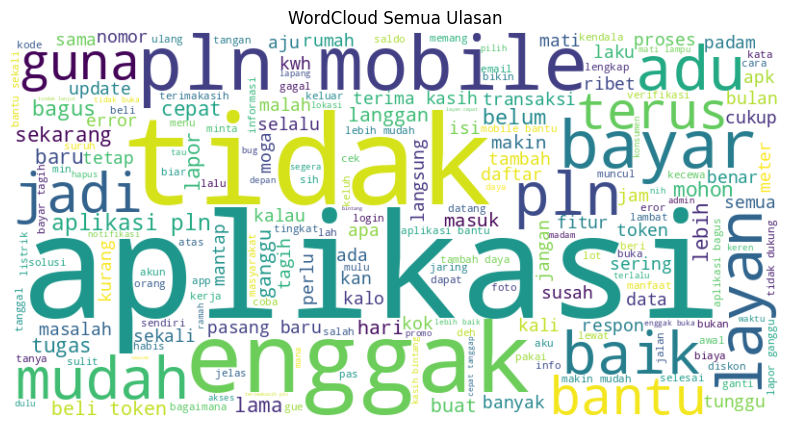

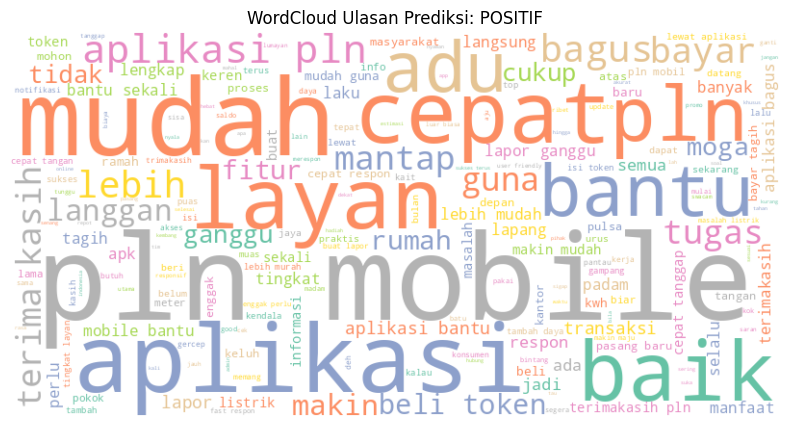

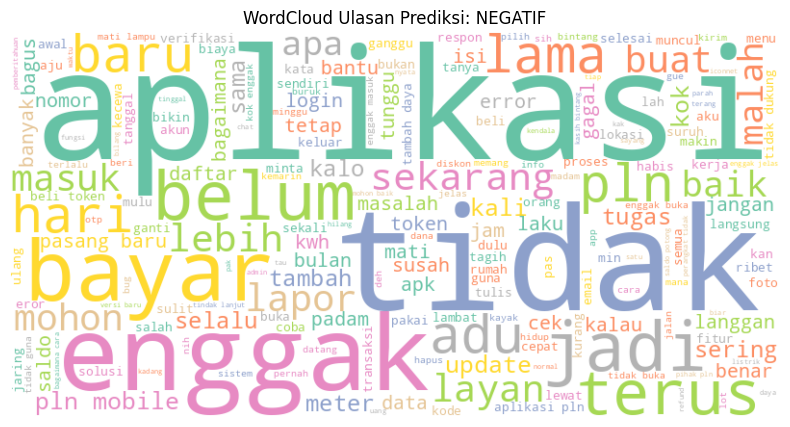

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks ulasan dari data uji dan hasil prediksi
df_test_pred = pd.DataFrame({'ulasan': X_test, 'y_true': y_test, 'y_pred': y_pred})

# WordCloud untuk semua ulasan
all_text = " ".join(df_test_pred['ulasan'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Semua Ulasan')
plt.show()

# WordCloud per kelas prediksi
for sentiment_encoded in df_test_pred['y_pred'].unique():
    text = " ".join(df_test_pred[df_test_pred['y_pred'] == sentiment_encoded]['ulasan'])
    sentiment_label = le.inverse_transform([sentiment_encoded])[0]
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud Ulasan Prediksi: {sentiment_label.upper()}')
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

parameters = {'alpha':[0.1, 0.5, 1.0]}
nb = MultinomialNB()
clf = GridSearchCV(nb, parameters, scoring='f1_macro', cv=5)
clf.fit(X_train_tfidf, y_train)
print(clf.best_params_, clf.best_score_)

{'alpha': 1.0} 0.8554124235985873


# **Kesimpulan**



```
Akurasi keseluruhan: 86%

```

| Label       | Precision | Recall   | F1-Score | Catatan                                                                                                                               |
| ----------- | --------- | -------- | -------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Negatif** | 0.84      | **0.89** | 0.86     | Model **cukup andal** mendeteksi keluhan. |
| **Positif** | **0.88**  | 0.83     | 0.85     | Model **cukup presisi** mengenali pujian. Recall  lebih rendah, artinya masih ada pujian yang dikira keluhan.                 |

|                     | Predicted: Negatif      | Predicted: Positif     |
| ------------------- | ----------------------- | ---------------------- |
| **Actual: Negatif** | 552 (**True Negatif**)  | 70 (**False Positif**) |
| **Actual: Positif** | 108 (**False Negatif**) | 513 (**True Positif**) |

True Negatif (TN) = 552
Jumlah ulasan negatif yang berhasil dikenali dengan benar sebagai negatif oleh model.

False Positif (FP) = 70
Ulasan negatif yang salah diklasifikasikan sebagai positif.

False Negatif (FN) = 108
Ulasan positif yang salah diklasifikasikan sebagai negatif.

True Positif (TP) = 513
Jumlah ulasan positif yang benar dikenali sebagai positif oleh model.

TF-IDF dengan n-gram (unigram) menghasilkan performa yang cukup baik pada model Multinomial Naive Bayes untuk klasifikasi sentimen positif dan negatif dengan akurasi 86%. Kata-kata khas seperti “mudah”, “bantu”, “tidak”, dan “enggak” dikenali dengan baik. Namun, model tetap terbatas dalam memahami konteks kalimat, karena hanya mengandalkan frekuensi kata secara independen.